# Adjacency Matrices and the Page-Rank algorithm

This lab explores the Google Page-Rank Algorithm and it's relation to adjacency matrices. 

## 1. Graphs and Matrices

Below we see a graph, we came across these in FPM, and now they return! This time, we assign directions to our edges, and so this becomes a $\textit{directed}$ graph. We say that the edge $\textit{enters}$ Node A and $\textit{leaves}$ Node B. For simplicity, all graphs in this notebook will be simple graphs, i.e. no edge enters and leaves the same node, and no two edges enter and leave the same nodes.

Above we have a list of tuples, each of which corresponds to a pair of nodes which are connected by an edge. This list corresponds exactly to the above graph, you should check this for yourself! 

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd">Exercise 1.1</h3><span style="color:#fafbfc;background-color: #c93f3a; border-radius: 3pt">(assessed 1pts)</span>
    
Write a function that takes a list of directed edges represented by pairs (a, b) and a node N and counts the number of nodes with an edge entering n and the number with an edge leaving n. Return this as a tuple.

</div>

In [ ]:
def count_in_out_edges(edges, N):
    '''This function should take a list "edges" of pairs (a,b) of nodes indicating a directed edge from node a to node b, a specific node N 
    and return a tuple of the edges going into and out of N'''
    #your code goes here
    raise NotImplementedError

In [43]:
#small example cases for debugging
g1 = generate_d_graph(3)
g2 = generate_d_graph(2)
assert(count_in_out_edges(g1) == in_out_sol(g1))
assert(count_in_out_edges(g2) == in_out_sol(g2))
#bigger test cases
h1 = generate_d_graph(15)
h2 = generate_d_graph(20)
assert(count_in_out_edges(h1) == in_out_sol(h1))
assert(count_in_out_edges(h2) == in_out_sol(h2))
print("Success! Your function works for the given input.")

[]
[]


NameError: name 'count_in_out_edges' is not defined

We can alternatively display the relationships between nodes using a matrix, so when an edge leaves node A and enters node B, we have a 1 in the position $M_{BA}$, NOT in $M_{AB}$. When two nodes C and D are not connected, we have a 0 in $M_{CD}$ and $M_{DC}$.

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd;">Exercise 1.2</h3><span style="color:#fafbfc; background-color: #c93f3a; border-radius: 3pt">(assessed 2pts)</span>
    
Write a function that takes a list of directed edges represented by pairs (a, b) and returns the matrix associated with that graph.

</div>

In [ ]:
def adjacency_Matrix(edges, n):
    '''This function should take a list "edges" of pairs (a,b) of nodes indicating a directed edge from node a to node b, the number of nodes n
     and return the adjacency matrix associated with the graph'''
    #your code goes here
    raise NotImplementedError

In [6]:
#simple cases with 5 or less vertices
g1 = generate_d_graph(3)
g2 = generate_d_graph(2)
assert(adjacency_Matrix(g1, 3).equals(adjacency_sol(g1, 3)))
assert(adjacency_Matrix(g2, 3).equals(adjacency_sol(g2, 3)))
#larger test cases
h1 = generate_d_graph(15)
h2 = generate_d_graph(20)
assert(adjacency_Matrix(h1, 3).equals(adjacency_sol(h1, 3)))
assert(adjacency_Matrix(h2, 3).equals(adjacency_sol(h2, 3)))
print("Success! Your function works for the given input.")

['B']


ValueError: Sample larger than population or is negative

## 2. Adding Weighting

When we add weight to a graph, this can think of this as though we're adding tolls on each edge, and consequently imposing a 'cost' on traversing that edge. As our graphs are directed, we can only traverse edges in one direction, and this doesn't change when we add weights.

!!!1If all roads lead to the node of Rome that would suggest that the node Rome is most important node. The weight of a node is therefore calculated by adding up how many other nodes go into it.

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd;">Exercise 2.1</h3><span style="color:#fafbfc; background-color: #c93f3a; border-radius: 3pt">(assessed 2pts)</span>
    
Write a function that takes a list of directed edges represented by pairs (a, b) and returns a list represented by pairs (a,c) with the importance of the edge indicated by c, this being a direct calculation of how many nodes go into it.

</div>

In [ ]:
def weighting_calc_simple(edges, n):
    '''This function should take a list "edges" of pairs (a,b) of nodes indicating a directed edge from node a to node b, the number of nodes n
     and return a list of pairs (a,c) with c being the importance of the node'''
    #your code goes here
    raise NotImplementedError

!!!!However, let us say that everyone recommends Rome because Rome recommends everyone back. Now it doesn't sound like such a cool city anymore. We would like our weighting to reflect that - the weighting of a node should therefore be divided by the amount of nodes that it itself goes into it.

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd;">Exercise 2.2</h3><span style="color:#fafbfc; background-color: #c93f3a; border-radius: 3pt">(assessed 2pts)</span>
    
Modify your function above to take in the same list of directed edges represented by pairs $(a,b)$ but to output a list of pairs $(a,c)$ where $a$ is the node and $c$ is the adjusted weighting, which is given by the amount of nodes go into it divided by how many nodes it goes into.

</div>

In [ ]:
def weighting_calc_adjusted(edges, n):
    '''This function should take a list "edges" of pairs (a,b) of nodes indicating a directed edge from node a to node b, the number of nodes n
     and return a list of pairs (a,c) with c being our newly defined weighting of the node'''
    #your code goes here
    raise NotImplementedError

## 3. Markov Matrices

Markov matrices play a crucial role in various fields, including probability theory and dynamic systems. In this section, we will examine the properties of Markov matrices and develop a function to validate whether a given matrix conforms to the Markov property. Understanding Markov matrices is essential for analysing processes with probabilistic transitions.

Recall that a Markov matrix has non-negative entries and that the sum of entries of each column equal to 1. This tells us something very important about Markov matrices' eigenvalues. Recall the proof of Lemma 4.7.6 from your notes: a Markov matrix always has $\lambda = 1$ as an eigenvalue. Do you think you can come up with a function that tests for this?

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd;">Exercise 3.1</h3><span style="color:#fafbfc; background-color: #c93f3a; border-radius: 3pt">(assessed 1pts)</span>
    
Write a function that takes an $n\times n$ matrix and returns whether or not that matrix is a valid Markov matrix.

</div>

In [ ]:
def validate_Markov(M):
    '''This function takes in a matrix M and returns whether or not it is a Markov Matrix'''
    #your code goes here
    raise NotImplementedError

In [ ]:
#small matrices for easy test cases
assert(validate_Markov(generate_markov(4)))
assert(validate_Markov(generate_markov(4) + 0.2*adjacency_sol(generate_d_graph(4))))
#big bad test cases
assert(validate_Markov(generate_markov(25)))
assert(validate_Markov(generate_markov(25)) + 0.03*adjacency_sol(generate_d_graph(25)))
print("Success! Your function works for the given test input.")

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd;">Exercise 3.2</h3><span style="color:#fafbfc; background-color: #c93f3a; border-radius: 3pt">(assessed 1pts)</span>
    
Write a function that returns a Markov matrix for a given adjacency matrix.

</div>

## 4. Teleportation Matrices

If we think about our graphs, with each node as a webpage, and each edge as a link between two webpages, we encounter some issues

dangling node
disconnected components

We also have, if we take a random walk over our webpages, the chance to 

These would be, in practice, 




ex: how to make



## 5. PageRank Algorithm

section 5: page rank
use sage get evec to do page rank
ex: get rank of nodes

In [4]:
from random import sample
from random import randint
def generate_d_graph(n):
    if n > 26:
        raise ValueError("n must be less than or equal to 26")
    graph = []
    nodes = [chr(65+i) for i in range(n)]
    for node in nodes:
        nodes_copy = nodes.copy()
        nodes_copy.remove(node)
        graph += [(node, i) for i in sample(nodes_copy, randint(0,1))]
    connected_nodes = [i[0] for i in graph] + [i[1] for i in graph]
    unconnected_nodes = [i for i in nodes if i not in connected_nodes]

    print(unconnected_nodes)
    
    for node in unconnected_nodes:
        nodes_copy = nodes.copy()
        nodes_copy.remove(node)
        graph += [(node, i) for i in sample(nodes_copy, randint(1,4))]
    
    return graph

In [ ]:
def markov_sol(M):
    return ([1] * len(M.rows())).equals([sum(row) for row in M])

In [ ]:
def adjacency_sol(edges, n):
    matrix_list = [[0]*n]
    for edge in edges:
        matrix_list[edge[1], edge[0]] = 1
    return Matrix(matrix_list)

In [1]:
def in_out_sol(edges, g):
    return (sum([1 if edge[1] == g else 0 for edge in edges]), sum([1 if edge[0] == g else 0 for edge in edges]))

In [ ]:
from random import uniform
def generate_Markov(n):
    matrix_list = [[uniform(0, 0.1 / n) for i in range(k)] for j in range(n)]
    for j, r in enumerate(matrix_list):
        r[j] += 1 - sum(r)
    return Matrix(matrix_list)

['A']
(2, 1)


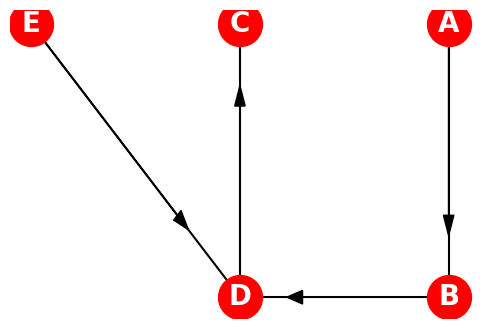

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def show_graph(graph):
    nodes = sorted(set([i[0] for i in graph] + [i[1] for i in graph]))
    n = len(nodes)
    node_points = {node:(0-(i//int((n)**0.5)), 0-(i%int((n)**0.5))) for i,node in enumerate(nodes)}

    print(((n//int((n)**0.5)),(n%int((n)**0.5))))
    fig, ax = plt.subplots(figsize=((n//int((n)**0.5))+4,((n-1)%int((n)**0.5))+4))

    for node,xy in node_points.items():
        ax.scatter(xy[0], xy[1], s=1000, color="red", zorder=1)
        for connected_node in [i[1] for i in graph if node == i[0]]:
            c_node_xy = node_points[connected_node]
            d_x = (c_node_xy[0]-xy[0])
            d_y = (c_node_xy[1]-xy[1])
            sign = 1
            if d_x == 0 and abs(d_y)>1:
                if xy[0] == 0 or xy[0]==(n-1):
                    sign = -1
                y_vals = np.linspace(xy[1], c_node_xy[1], 100)
                x_func = lambda y : sign*(0.3)*(y-c_node_xy[1])*(y-xy[1]) + xy[0]
                ax.plot(x_func(y_vals), y_vals, zorder=0, color="black")
                ax.arrow(x_func(y_vals[50]), y_vals[50], 0.01*d_x, 0.01*d_y, zorder=0, color="black", head_width=0.05)
            elif d_y == 0 and abs(d_x)>1:
                if xy[1] == 0 or xy[1]==(n-1):
                    sign = -1
                x_vals = np.linspace(xy[0], c_node_xy[0], 100)
                y_func = lambda x : sign*(0.3)*(x-c_node_xy[0])*(x-xy[0]) + xy[1]
                ax.plot(x_vals, y_func(x_vals), zorder=0, color="black")
                ax.arrow(x_vals[50], y_func(x_vals[50]), 0.01*d_x, 0.01*d_y, zorder=0, color="black", head_width=0.05)
            else:
                ax.plot([xy[0], c_node_xy[0]], [xy[1], c_node_xy[1]], zorder=0, color="black")
                ax.arrow(xy[0], xy[1], d_x*0.7, d_y*0.7, zorder=0, color="black", head_width=0.05)
        ax.annotate(node, xy, ha='center', va='center', weight='bold', color="white", fontsize=20)

    ax.axis('off')

    plt.show()

show_graph(generate_d_graph(5))